In [1]:
import pandas as pd
df = pd.read_csv('stroke_prediction_data.csv')
df.head()

,Age,Gender,Hypertension,Diabetes,Heart Disease,Smoking History,Cholesterol Level,Systolic Blood Pressure,Diastolic Blood Pressure,MRI Scan Results,CT Scan Results,Family History of Stroke,Alcohol Consumption,Physical Activity,Body Mass Index (BMI),Glucose Level,Target
0,88,Other,1,1,1,never smoked,281.36,122,93,Abnormal,Abnormal,0,Low,Moderate,31.1,156.40,1
1,86,Other,0,1,0,never smoked,232.67,127,82,Normal,Abnormal,1,High,High,15.6,184.68,0
2,45,Other,0,1,1,smokes,290.72,154,77,Abnormal,Abnormal,1,High,Low,19.7,92.06,1
3,69,Male,0,1,1,formerly smoked,162.88,146,66,Abnormal,Normal,1,Low,Moderate,34.4,168.49,1
4,30,Other,1,0,0,never smoked,221.67,129,81,Abnormal,Abnormal,1,High,Low,18.5,238.78,0


In [2]:
# 1. Basic properties
# Shape of the dataset: Number of rows and columns
print("Shape of the dataset:", df.shape)

Shape of the dataset: (12000, 17)


In [3]:
# Data types and null values
print("\nData types and null values:")
print(df.info())


Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12000 non-null  int64  
 1   Gender                    12000 non-null  object 
 2   Hypertension              12000 non-null  int64  
 3   Diabetes                  12000 non-null  int64  
 4   Heart Disease             12000 non-null  int64  
 5   Smoking History           12000 non-null  object 
 6   Cholesterol Level         12000 non-null  float64
 7   Systolic Blood Pressure   12000 non-null  int64  
 8   Diastolic Blood Pressure  12000 non-null  int64  
 9   MRI Scan Results          12000 non-null  object 
 10  CT Scan Results           12000 non-null  object 
 11  Family History of Stroke  12000 non-null  int64  
 12  Alcohol Consumption       12000 non-null  object 
 13  Physical Activity         12000 

In [4]:
# 2. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Age                         0
Gender                      0
Hypertension                0
Diabetes                    0
Heart Disease               0
Smoking History             0
Cholesterol Level           0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
MRI Scan Results            0
CT Scan Results             0
Family History of Stroke    0
Alcohol Consumption         0
Physical Activity           0
Body Mass Index (BMI)       0
Glucose Level               0
Target                      0
dtype: int64


In [5]:
# 3. Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [6]:
# 4. Statistical summary
# Useful for numerical data
print("\nStatistical summary:")
display(df.describe())


Statistical summary:


,Age,Hypertension,Diabetes,Heart Disease,Cholesterol Level,Systolic Blood Pressure,Diastolic Blood Pressure,Family History of Stroke,Body Mass Index (BMI),Glucose Level,Target
count,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,54.003333,0.49900,0.494167,0.497917,225.669910,134.862833,90.132167,0.503000,27.478900,160.208986,0.565583
std,21.080323,0.50002,0.499987,0.500016,43.265221,26.224511,17.646099,0.500012,7.225102,52.367455,0.495701
min,18.000000,0.00000,0.000000,0.000000,150.010000,90.000000,60.000000,0.000000,15.000000,70.050000,0.000000
25%,36.000000,0.00000,0.000000,0.000000,188.427500,112.000000,75.000000,0.000000,21.200000,114.855000,0.000000
50%,54.000000,0.00000,0.000000,0.000000,225.890000,135.000000,90.000000,1.000000,27.600000,160.580000,1.000000
75%,72.000000,1.00000,1.000000,1.000000,263.350000,157.000000,105.000000,1.000000,33.700000,206.460000,1.000000
max,90.000000,1.00000,1.000000,1.000000,299.990000,180.000000,120.000000,1.000000,40.000000,249.970000,1.000000


In [7]:
# 5. Unique values in each column
print("\nUnique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unique values in each column:
Age: 73 unique values
Gender: 3 unique values
Hypertension: 2 unique values
Diabetes: 2 unique values
Heart Disease: 2 unique values
Smoking History: 4 unique values
Cholesterol Level: 8269 unique values
Systolic Blood Pressure: 91 unique values
Diastolic Blood Pressure: 61 unique values
MRI Scan Results: 2 unique values
CT Scan Results: 2 unique values
Family History of Stroke: 2 unique values
Alcohol Consumption: 3 unique values
Physical Activity: 3 unique values
Body Mass Index (BMI): 251 unique values
Glucose Level: 8766 unique values
Target: 2 unique values


In [8]:
# Drop duplicates
df = df.drop_duplicates()

# Confirm duplicates are removed
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0


In [9]:
# Drop columns with all null values
df = df.dropna(axis=1, how='all')

# Drop rows with any null values (if critical features have nulls)
df = df.dropna(axis=0, how='any')

# Confirm no null values remain
print("Missing values after dropping rows and columns:")
print(df.isnull().sum())

Missing values after dropping rows and columns:
Age                         0
Gender                      0
Hypertension                0
Diabetes                    0
Heart Disease               0
Smoking History             0
Cholesterol Level           0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
MRI Scan Results            0
CT Scan Results             0
Family History of Stroke    0
Alcohol Consumption         0
Physical Activity           0
Body Mass Index (BMI)       0
Glucose Level               0
Target                      0
dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categorical columns
label_encoder = LabelEncoder()
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Smoking History'] = label_encoder.fit_transform(df['Smoking History'])
df['MRI Scan Results'] = label_encoder.fit_transform(df['MRI Scan Results'])
df['CT Scan Results'] = label_encoder.fit_transform(df['CT Scan Results'])
df['Alcohol Consumption'] = label_encoder.fit_transform(df['Alcohol Consumption'])
df['Physical Activity'] = label_encoder.fit_transform(df['Physical Activity'])
df['Family History of Stroke'] = label_encoder.fit_transform(df['Family History of Stroke'])
df['Body Mass Index (BMI)'] = label_encoder.fit_transform(df['Body Mass Index (BMI)'])
df['Glucose Level'] = label_encoder.fit_transform(df['Glucose Level'])
df['Target'] = label_encoder.fit_transform(df['Target'])

In [14]:
df.head()

,Age,Gender,Hypertension,Diabetes,Heart Disease,Smoking History,Cholesterol Level,Systolic Blood Pressure,Diastolic Blood Pressure,MRI Scan Results,CT Scan Results,Family History of Stroke,Alcohol Consumption,Physical Activity,Body Mass Index (BMI),Glucose Level,Target
0,70,2,1,1,1,2,7223,32,33,0,0,0,1,2,161,4171,1
1,68,2,0,1,0,2,4529,37,22,1,0,1,0,0,6,5505,0
2,27,2,0,1,1,3,7746,64,17,0,0,1,0,1,47,1063,1
3,51,1,0,1,1,1,693,56,6,0,1,1,1,2,194,4735,1
4,12,2,1,0,0,2,3885,39,21,0,0,1,0,1,35,8216,0


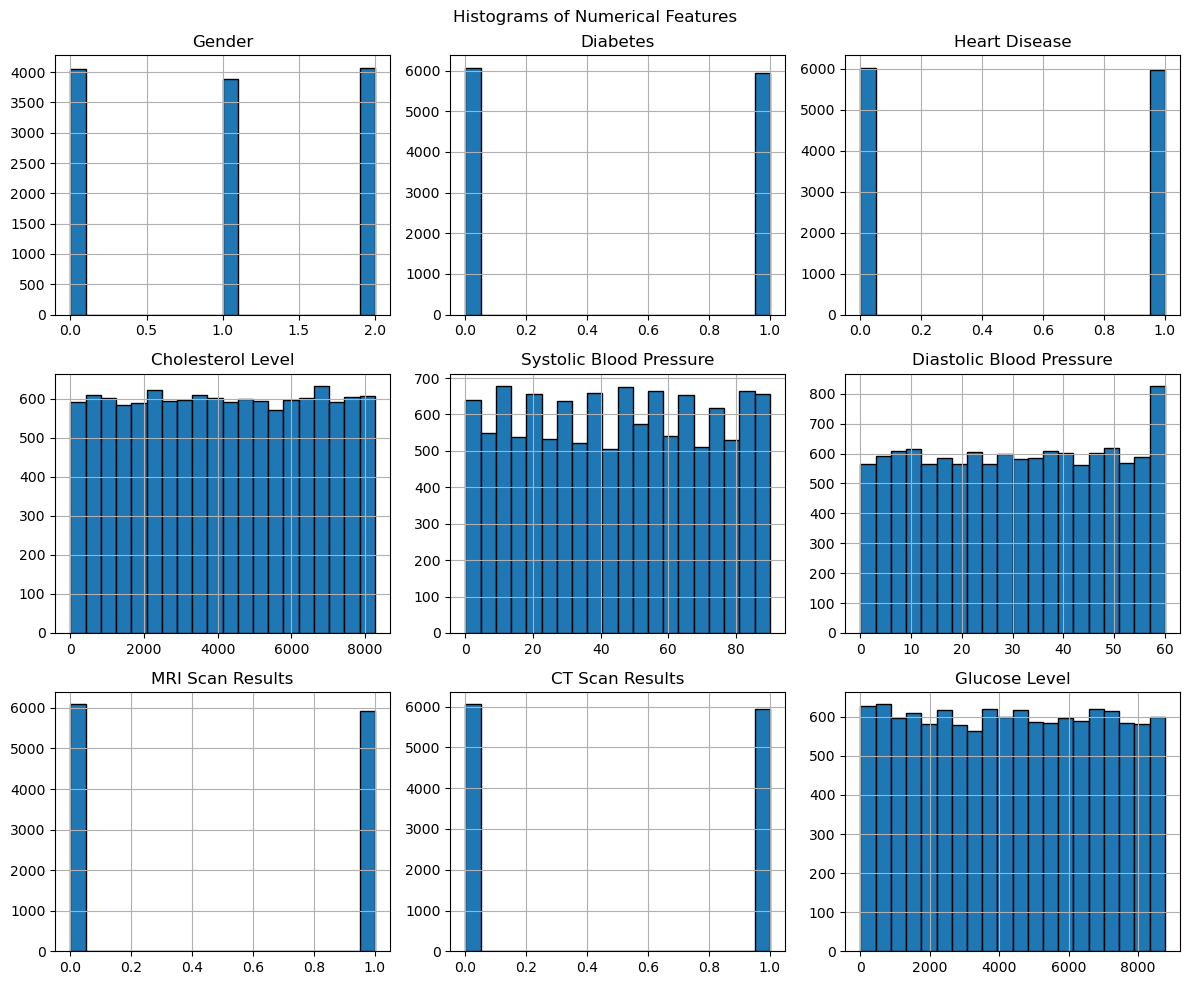

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
numerical_columns = ['Gender', 'Diabetes', 'Heart Disease', 'Cholesterol Level', 'Systolic Blood Pressure',	'Diastolic Blood Pressure',	'MRI Scan Results',	'CT Scan Results', 'Glucose Level']

df[numerical_columns].hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

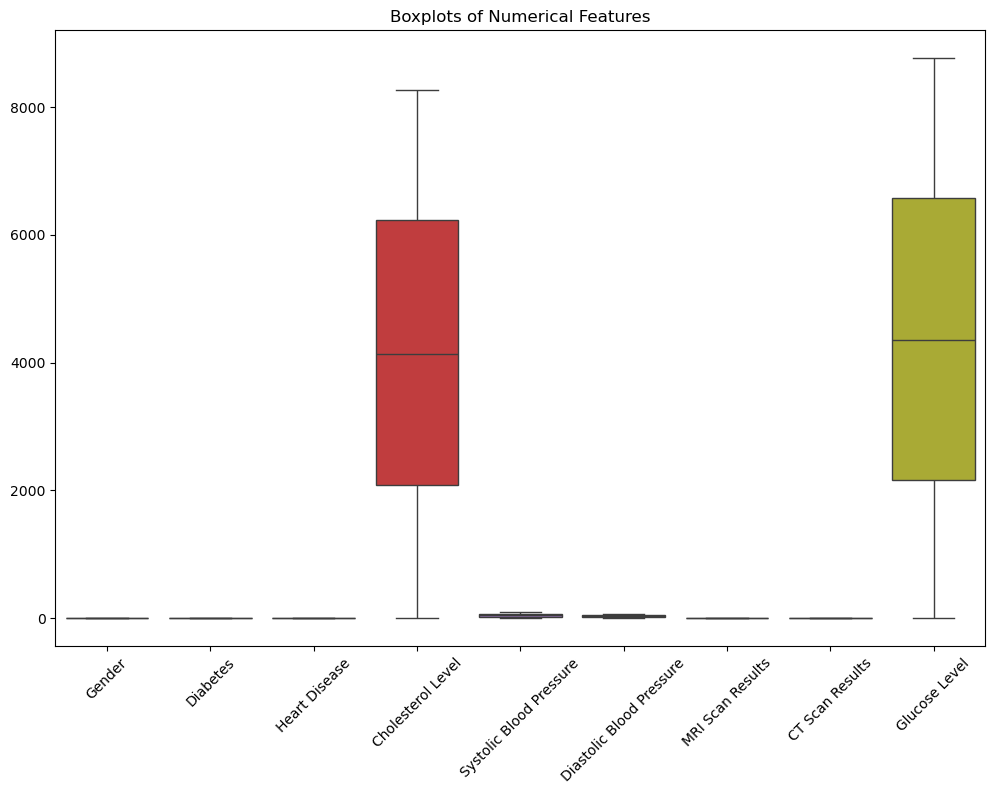

In [19]:
# Plot boxplots to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

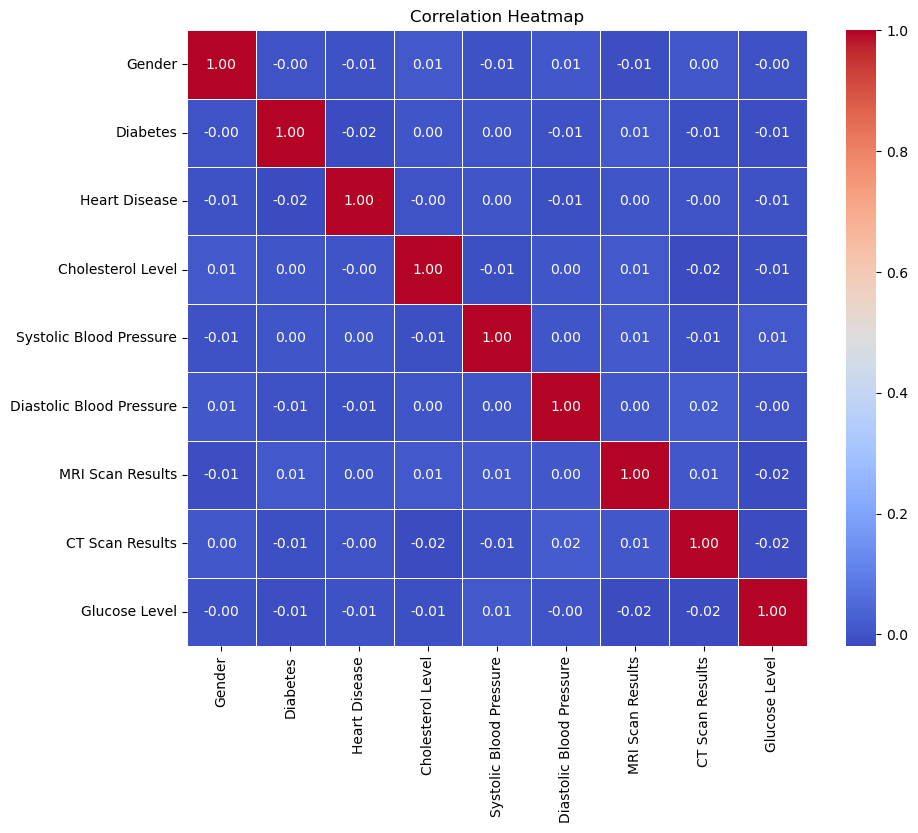

In [20]:
# Calculate correlations
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

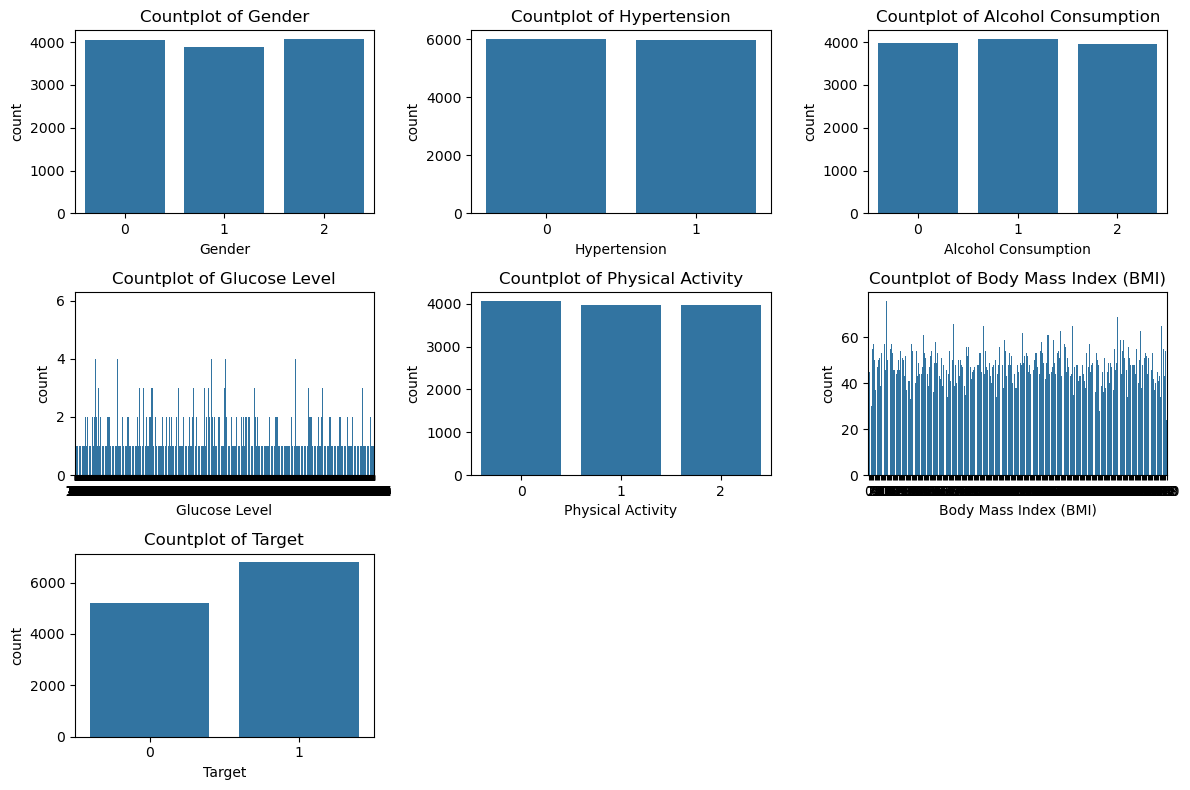

In [23]:
# Plot count plots for categorical variables
categorical_columns = ['Gender', 'Hypertension', 'Alcohol Consumption', 'Glucose Level', 'Physical Activity','Body Mass Index (BMI)', 'Target']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.tight_layout()
plt.show()

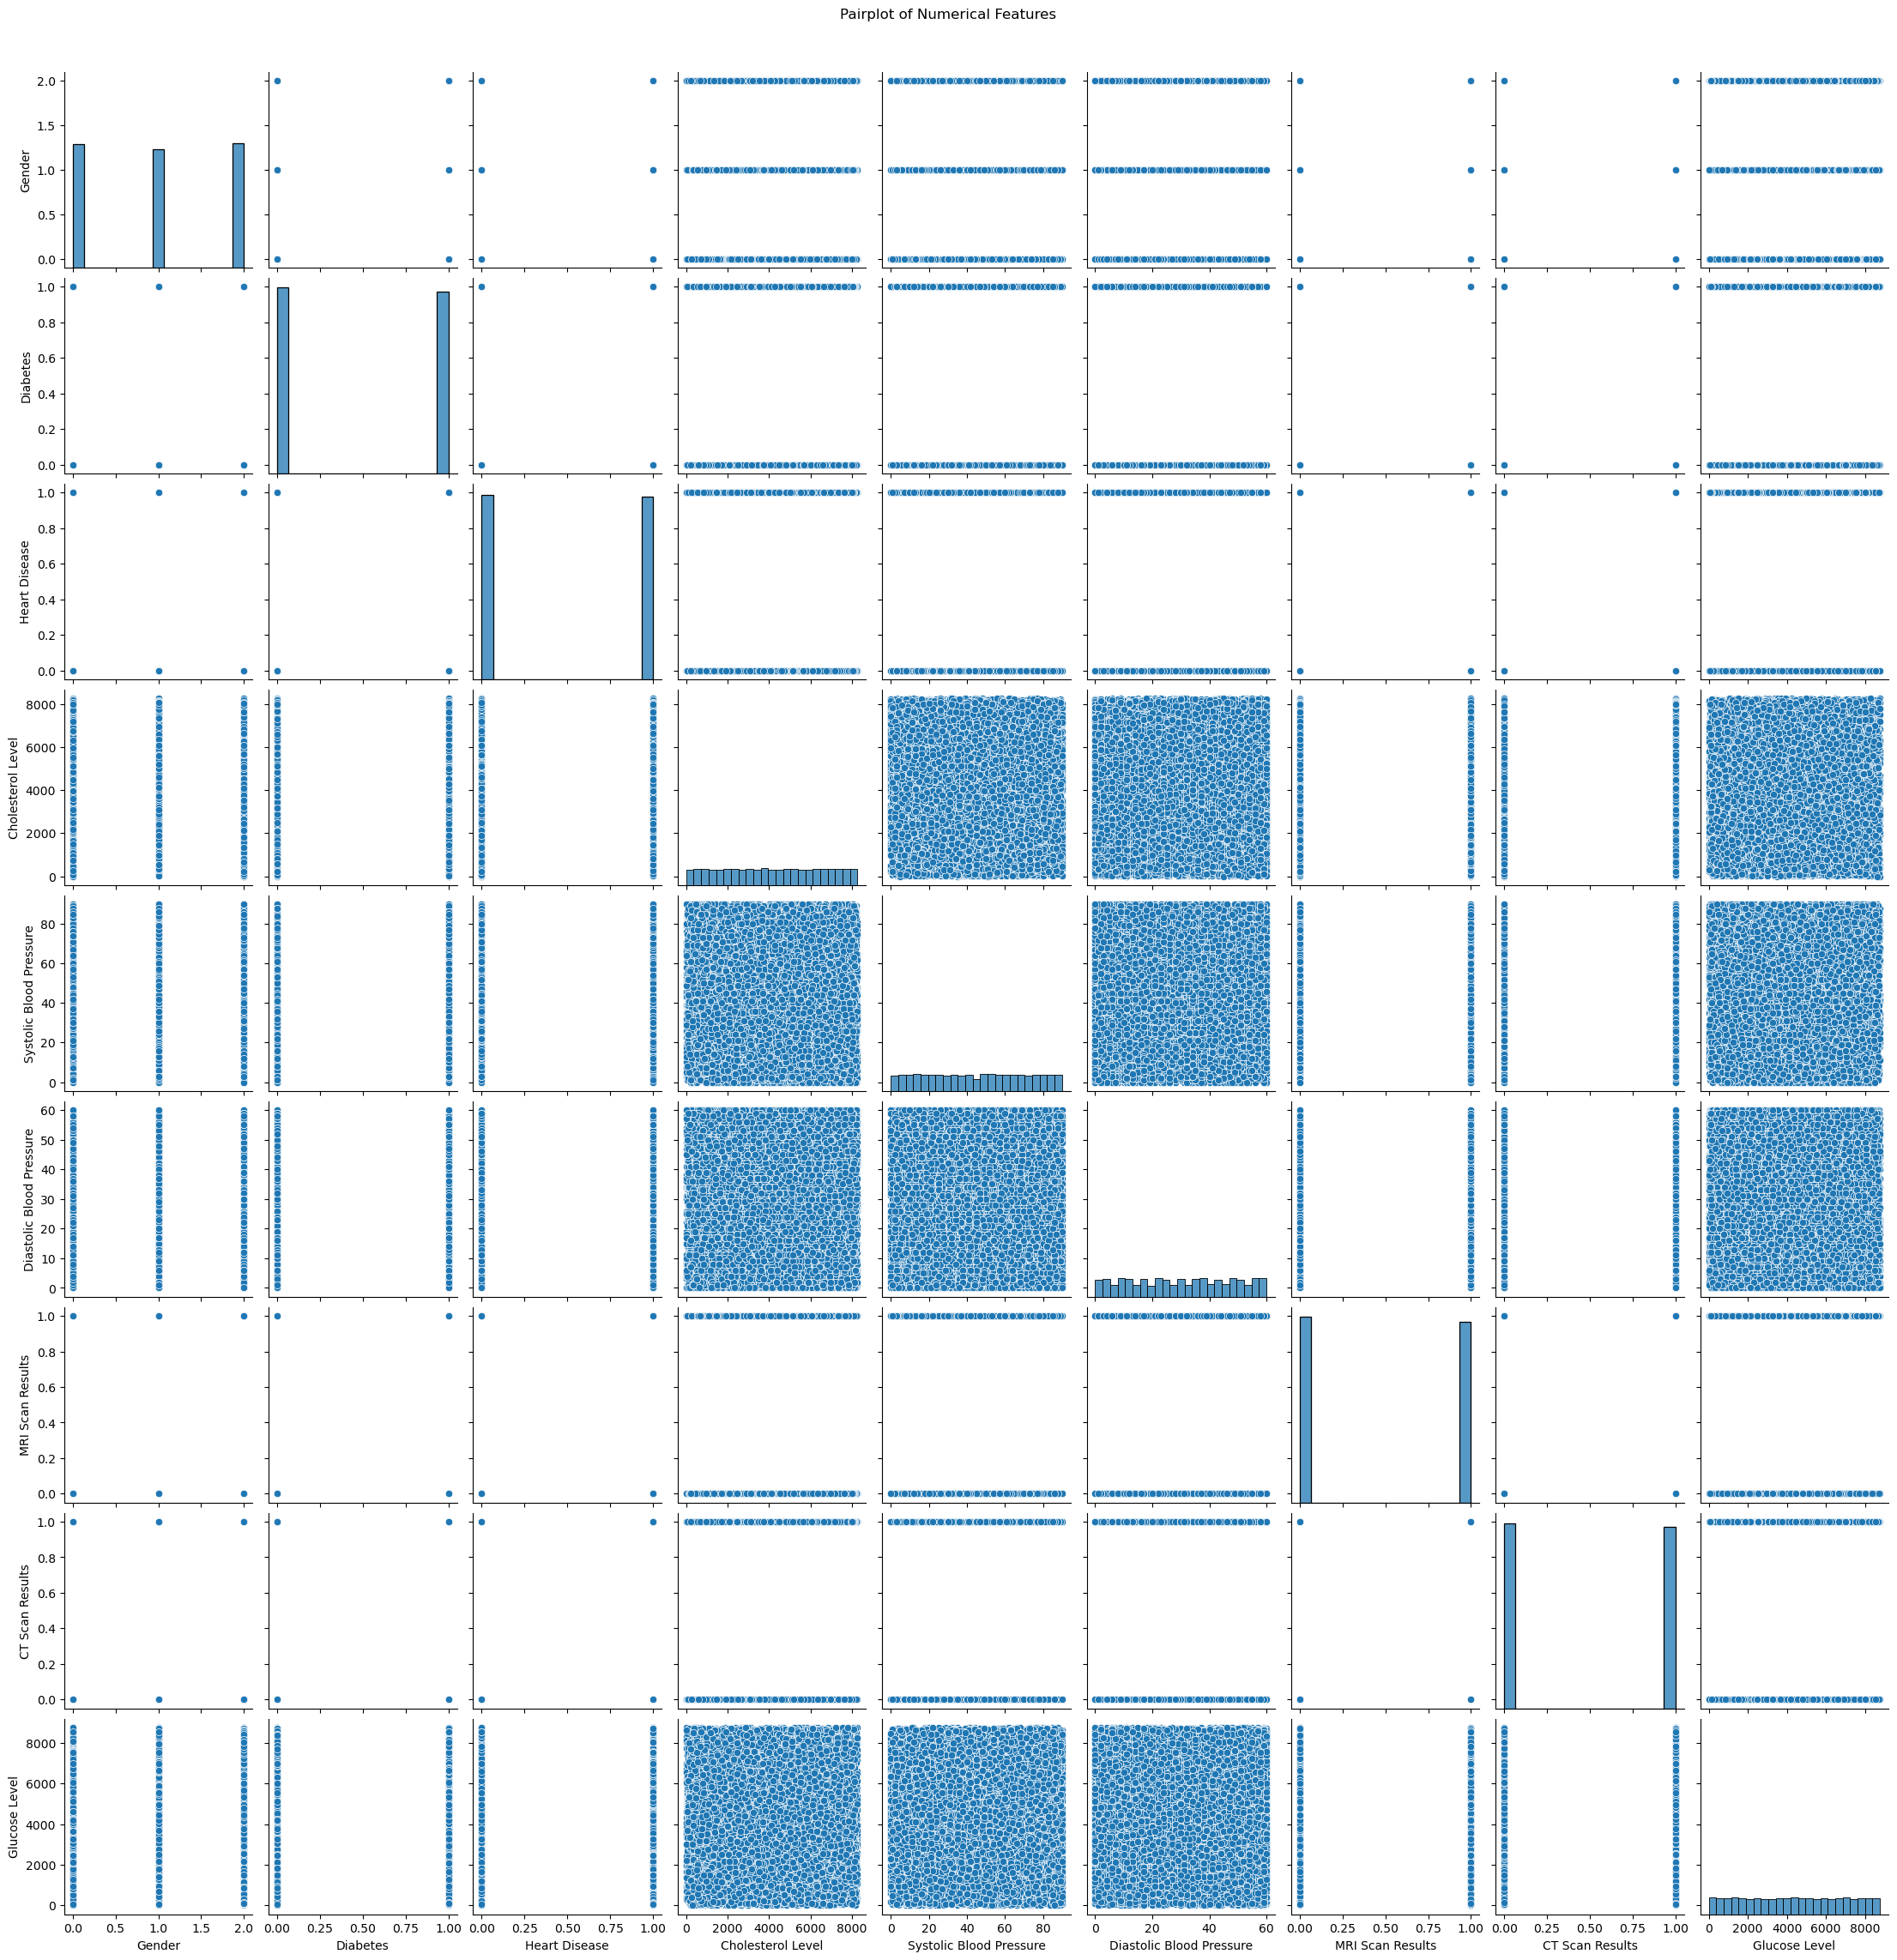

In [24]:
# Plot pairplot for numerical features
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

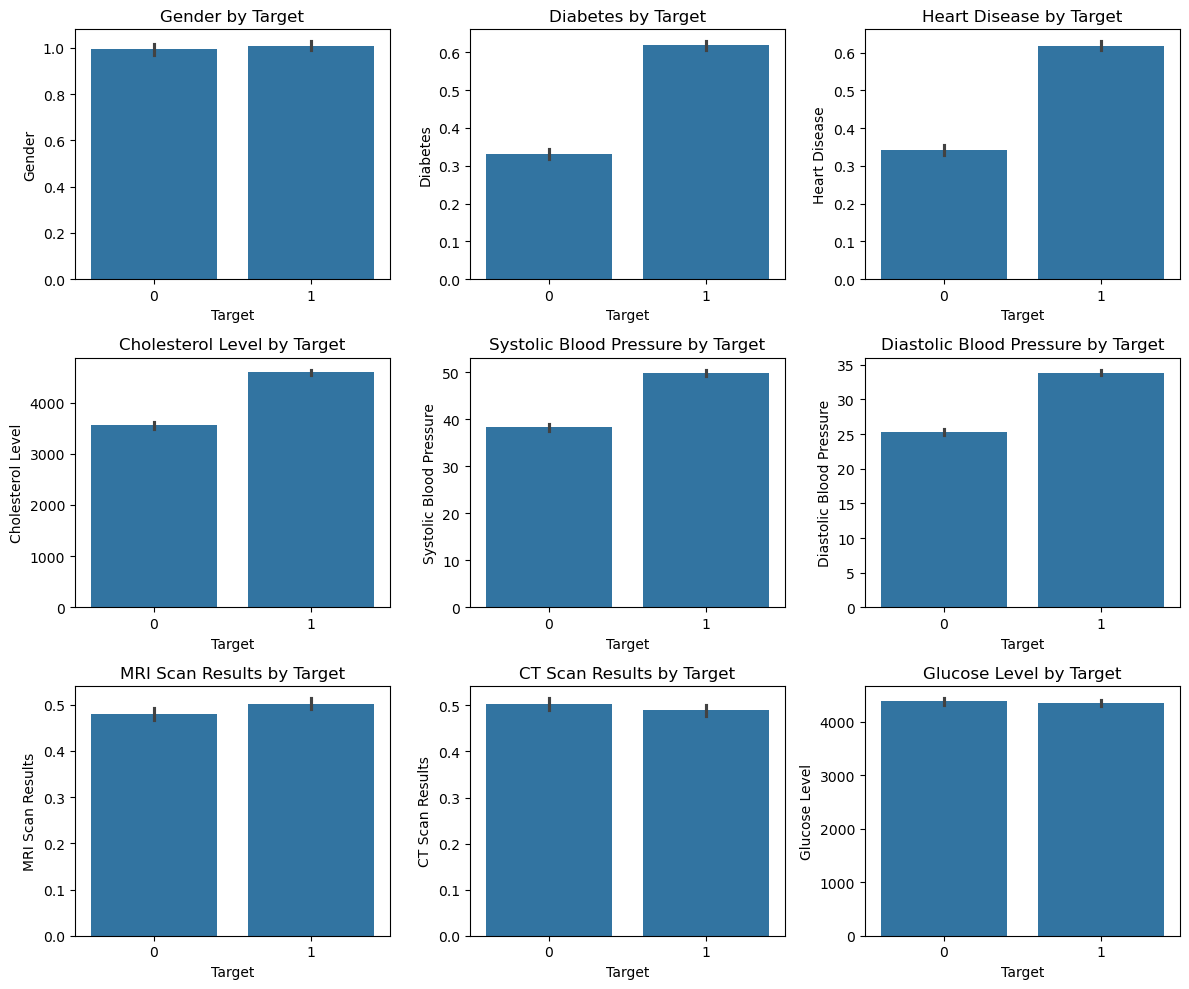

In [28]:
# Plot barplots for numerical features grouped by Cancer Stage
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.barplot(data=df, x='Target', y=col)
    plt.title(f'{col} by Target')
    plt.tight_layout()
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import joblib  # To save the best model

In [30]:
# Features and target
X = df.drop(columns=['Target'])
y = df['Target']

In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [34]:
# Predictions and Evaluation
y_pred_logreg = logreg.predict(X_test_scaled)
logreg_report = classification_report(y_test, y_pred_logreg, zero_division=0)
logreg_cm = confusion_matrix(y_test, y_pred_logreg)

# Print results
print("Logistic Regression Evaluation:")
print(logreg_report)
print("Confusion Matrix:")
print(logreg_cm)

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1505
           1       0.87      0.87      0.87      2095

    accuracy                           0.85      3600
   macro avg       0.84      0.84      0.84      3600
weighted avg       0.85      0.85      0.85      3600

Confusion Matrix:
[[1223  282]
 [ 274 1821]]


In [35]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Predictions and Evaluation
y_pred_rf = rf.predict(X_test_scaled)
rf_report = classification_report(y_test, y_pred_rf, zero_division=0)
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Print results
print("Random Forest Evaluation:")
print(rf_report)
print("Confusion Matrix:")
print(rf_cm)

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1505
           1       0.93      0.95      0.94      2095

    accuracy                           0.93      3600
   macro avg       0.93      0.93      0.93      3600
weighted avg       0.93      0.93      0.93      3600

Confusion Matrix:
[[1351  154]
 [  96 1999]]


In [37]:
# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [38]:
# Predictions and Evaluation
y_pred_knn = knn.predict(X_test_scaled)
knn_report = classification_report(y_test, y_pred_knn, zero_division=0)
knn_cm = confusion_matrix(y_test, y_pred_knn)

# Print results
print("K-Nearest Neighbors Evaluation:")
print(knn_report)
print("Confusion Matrix:")
print(knn_cm)

K-Nearest Neighbors Evaluation:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1505
           1       0.83      0.83      0.83      2095

    accuracy                           0.80      3600
   macro avg       0.80      0.80      0.80      3600
weighted avg       0.80      0.80      0.80      3600

Confusion Matrix:
[[1152  353]
 [ 362 1733]]


In [39]:
# Support Vector Machine Model
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [40]:
# Predictions and Evaluation
y_pred_svm = svm.predict(X_test_scaled)
svm_report = classification_report(y_test, y_pred_svm, zero_division=0)
svm_cm = confusion_matrix(y_test, y_pred_svm)

# Print results
print("Support Vector Machine Evaluation:")
print(svm_report)
print("Confusion Matrix:")
print(svm_cm)

Support Vector Machine Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1505
           1       0.86      0.88      0.87      2095

    accuracy                           0.85      3600
   macro avg       0.84      0.84      0.84      3600
weighted avg       0.85      0.85      0.85      3600

Confusion Matrix:
[[1200  305]
 [ 244 1851]]


In [41]:
# Gradient Boosting Model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [42]:
# Predictions and Evaluation
y_pred_gb = gb.predict(X_test_scaled)
gb_report = classification_report(y_test, y_pred_gb, zero_division=0)
gb_cm = confusion_matrix(y_test, y_pred_gb)

# Print results
print("Gradient Boosting Evaluation:")
print(gb_report)
print("Confusion Matrix:")
print(gb_cm)

Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1505
           1       0.96      1.00      0.98      2095

    accuracy                           0.98      3600
   macro avg       0.98      0.97      0.97      3600
weighted avg       0.98      0.98      0.98      3600

Confusion Matrix:
[[1418   87]
 [   1 2094]]


In [43]:
# Store models and their evaluation results
models = {
    "Logistic Regression": logreg_report,
    "Random Forest": rf_report,
    "K-Nearest Neighbors": knn_report,
    "Support Vector Machine": svm_report,
    "Gradient Boosting": gb_report
}

In [44]:
# Calculate weighted average F1-scores using zero_division=0 to avoid precision issues
f1_scores = {
    "Logistic Regression": classification_report(y_test, y_pred_logreg, output_dict=True, zero_division=0)['weighted avg']['f1-score'],
    "Random Forest": classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)['weighted avg']['f1-score'],
    "K-Nearest Neighbors": classification_report(y_test, y_pred_knn, output_dict=True, zero_division=0)['weighted avg']['f1-score'],
    "Support Vector Machine": classification_report(y_test, y_pred_svm, output_dict=True, zero_division=0)['weighted avg']['f1-score'],
    "Gradient Boosting": classification_report(y_test, y_pred_gb, output_dict=True, zero_division=0)['weighted avg']['f1-score']
}

# Print the F1-scores for comparison
for model, f1_score in f1_scores.items():
    print(f"{model} Weighted F1-Score: {f1_score:.4f}")

Logistic Regression Weighted F1-Score: 0.8455
Random Forest Weighted F1-Score: 0.9303
K-Nearest Neighbors Weighted F1-Score: 0.8015
Support Vector Machine Weighted F1-Score: 0.8470
Gradient Boosting Weighted F1-Score: 0.9754


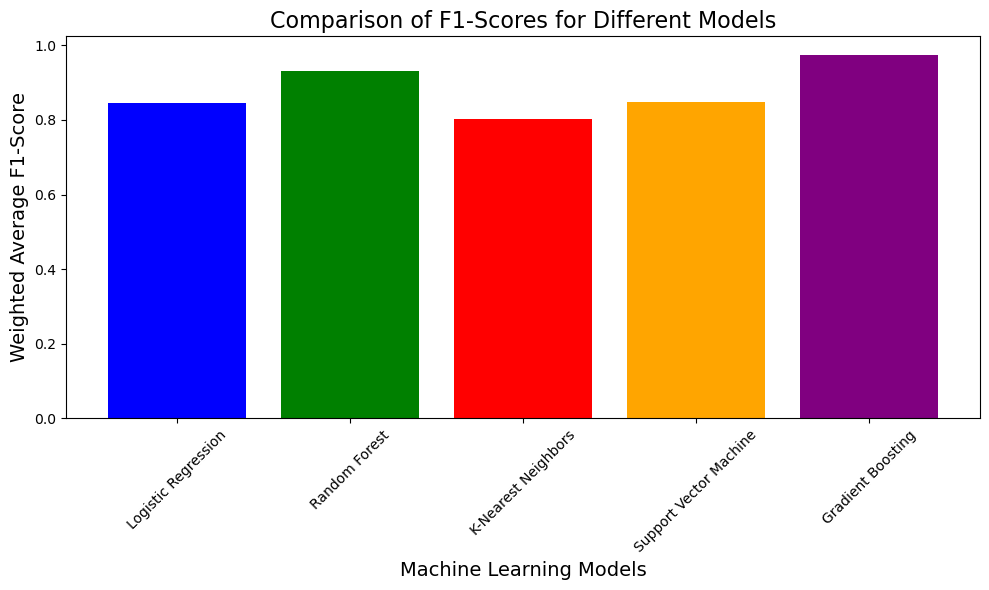

In [45]:
# Plotting the F1-scores of all models
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'green', 'red', 'orange', 'purple'])

# Adding titles and labels
plt.title("Comparison of F1-Scores for Different Models", fontsize=16)
plt.xlabel("Machine Learning Models", fontsize=14)
plt.ylabel("Weighted Average F1-Score", fontsize=14)

# Displaying the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
# Find the best model based on the highest F1-score
best_model_name = max(f1_scores, key=f1_scores.get)
print(f"Best model based on F1 score: {best_model_name}")

Best model based on F1 score: Gradient Boosting


In [47]:
# Select the best model based on F1-score
if best_model_name == "Logistic Regression":
    best_model = logreg
elif best_model_name == "Random Forest":
    best_model = rf
elif best_model_name == "K-Nearest Neighbors":
    best_model = knn
elif best_model_name == "Support Vector Machine":
    best_model = svm
else:
    best_model = gb

# Save the best model using joblib
joblib.dump(best_model, 'best_model.pkl')
print(f"Best model {best_model_name} saved as 'best_model.pkl'.")

Best model Gradient Boosting saved as 'best_model.pkl'.


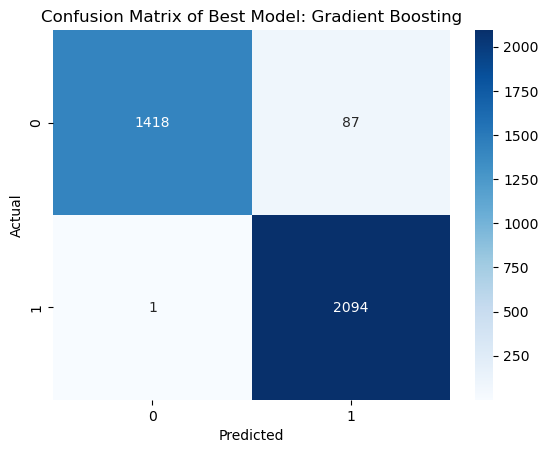

In [48]:
import numpy as np
# Display confusion matrix for the best model
best_cm = confusion_matrix(y_test, best_model.predict(X_test_scaled))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix of Best Model: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()